### Question 1  
Consider the data census_2024.csv as a whole population, obtain the
following statistics for the variables age and hours_per_week:

#### Mean, Standard deviation

In [2]:
import pandas as pd
from tabulate import tabulate

df = pd.read_csv('census_2024.csv')

table = [['DATA', 'MEAN', 'STD'], ['Age', float(df['age'].mean()), float(df['age'].std())], ['Hours Per Week', float(df['hours_per_week'].mean()), float(df['hours_per_week'].std())]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════╤═════════╤═════════╕
│ DATA           │    MEAN │     STD │
╞════════════════╪═════════╪═════════╡
│ Age            │ 38.4459 │ 13.1275 │
├────────────────┼─────────┼─────────┤
│ Hours Per Week │ 40.9369 │ 11.9716 │
╘════════════════╧═════════╧═════════╛


#### Randomly select different sample sizes and show how different proportion selection bias the mean and SD results.

In [38]:
import random

def sample_selection(percent, table, variable):
  print(f'\nSelected variable: {variable}')
  number = int(len(table) * percent) # we want to convert into an integer (number without decimal positions)
  print(f'Number of samples chose: {number}, which representes {percent*100}% of our population')
  temp = table[variable].sample(number) # select the sample
  print('Mean =', temp.mean()) # print the mean
  print('SD =', temp.std()) # print the SD

percentages = [0.01, 0.1, 0.5, 0.75]

for percent in percentages:
    sample_selection(percent, df, 'hours_per_week')
    sample_selection(percent, df, 'age')


Selected variable: hours_per_week
Number of samples chose: 289, which representes 1.0% of our population
Mean = 41.15916955017301
SD = 12.426824452555254

Selected variable: age
Number of samples chose: 289, which representes 1.0% of our population
Mean = 39.173010380622834
SD = 12.719100559046693

Selected variable: hours_per_week
Number of samples chose: 2895, which representes 10.0% of our population
Mean = 40.86044905008636
SD = 11.612637907146082

Selected variable: age
Number of samples chose: 2895, which representes 10.0% of our population
Mean = 38.52193436960276
SD = 13.181948730949463

Selected variable: hours_per_week
Number of samples chose: 14478, which representes 50.0% of our population
Mean = 40.970092554220194
SD = 12.057866424636366

Selected variable: age
Number of samples chose: 14478, which representes 50.0% of our population
Mean = 38.42181240502832
SD = 13.15354509408004

Selected variable: hours_per_week
Number of samples chose: 21717, which representes 75.0% o

#### Also, calculate the minimum sample size for a confidence level of 97.5% and a margin of error of 2.5%

In [41]:
import scipy.stats as st

CL = 0.975 # Confidence level
p = 0.5 # expected prevalence, 50% if unkown
e = 0.025 # error
N = len(df)

alpha_half = (1-CL)/2 # Calculate alpha/2
Z_score = st.norm.ppf(alpha_half + CL) # Get the Z value (tables) for the specified alpha
n = ((Z_score**2) * p * (1 - p)) / e**2 # Calculate the value of n (look at the formula in the slides)

print(f"The sample size needed for a confidence level of {CL * 100}%, an error of {e * 100}% and supposing that we don't know the population size is: {round(n, 0)}")

The sample size needed for a confidence level of 97.5%, an error of 2.5% and supposing that we don't know the population size is: 2010.0


### Question 2  
Consider the data census_2024.csv and obtain the following statistics:

#### Hours of work per week by gender: min, max, mean and SD

In [57]:
df_female = df[df['gender'] == ' Female']
df_male = df[df['gender'] == ' Male']

def print_stats(df, variable):
  print('Min:',df[variable].min())
  print('Max:',df[variable].max())
  print('Mean:',df[variable].mean())
  print('SD:',df[variable].std())

print_stats(df_female, 'hours_per_week')
print_stats(df_male, 'hours_per_week')

Min: 1
Max: 99
Mean: 36.92417923216768
SD: 11.450966113296833
Min: 1
Max: 99
Mean: 42.850905381280285
SD: 11.738694101900363


#### Histograms: one histogram per gender and another histogram combining both.

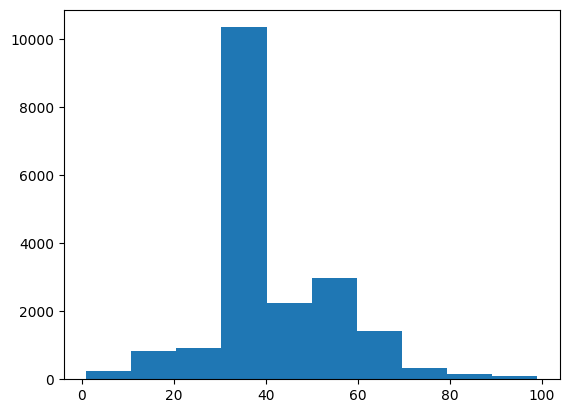

In [52]:
import matplotlib.pyplot as plt

plt.show(plt.hist(df_male['hours_per_week']))

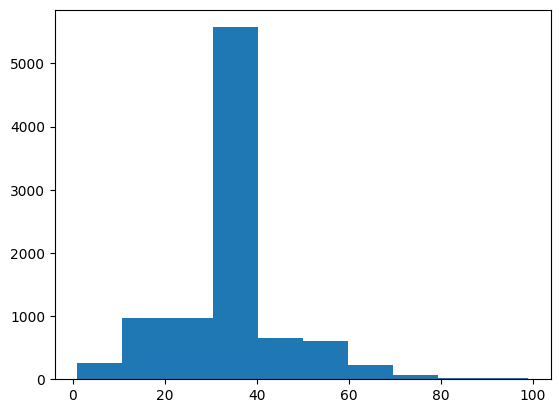

In [53]:
import matplotlib.pyplot as plt

plt.show(plt.hist(df_female['hours_per_week']))

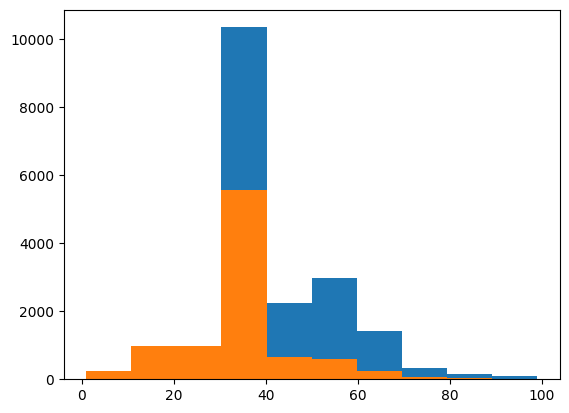

In [55]:
gender_list = df.gender.unique().tolist()

# Plot both distributions in the same graph:
plt.hist(df['hours_per_week'][(df['gender'] == gender_list[0])])
plt.hist(df['hours_per_week'][(df['gender'] == gender_list[1])])
plt.show()

#### Test for normality  
i. KS, Shapiro-Wilk, Jarque-Bera, Normaltest

In [61]:
print(df_male['hours_per_week'].mean())
print(df_male['hours_per_week'].dropna().mean())

print(df_male['hours_per_week'].dropna().std() == df_male['hours_per_week'].std())

42.850905381280285
42.850905381280285
True


In [64]:
# KSTEST

print(st.kstest(df_female['hours_per_week'], 'norm').pvalue)
print(st.kstest(df_male['hours_per_week'], 'norm').pvalue)

0.0
0.0


In [65]:
# SHAPIRO-WILK TEST

data_men = df_male['hours_per_week']
data_women = df_female['hours_per_week']

print(st.shapiro(data_men).pvalue)
print(st.shapiro(data_women).pvalue)


0.0
0.0


C:\Users\SLO\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [66]:
# JARQUE-BERA TEST

data_men = df_male['hours_per_week']
data_women = df_female['hours_per_week']

print(st.jarque_bera(data_men).pvalue)
print(st.jarque_bera(data_women).pvalue)

0.0
0.0


In [72]:
# NORMALITY TEST

data_men = df_male['hours_per_week']
data_women = df_female['hours_per_week']

print(st.normaltest(data_men).pvalue)
print(round(st.normaltest(data_women).pvalue,2))

0.0
0.0


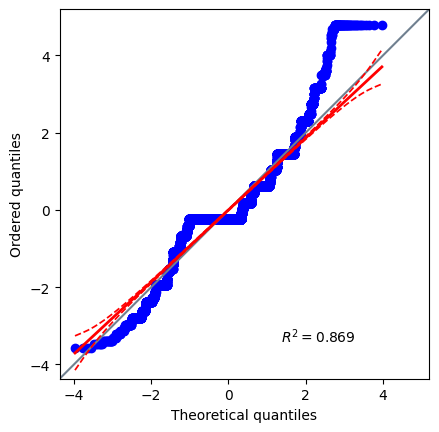

In [69]:
# Normality Test Graph
import pingouin as pg

plt.show(pg.qqplot(df_male['hours_per_week'], dist='norm', confidence=.95))

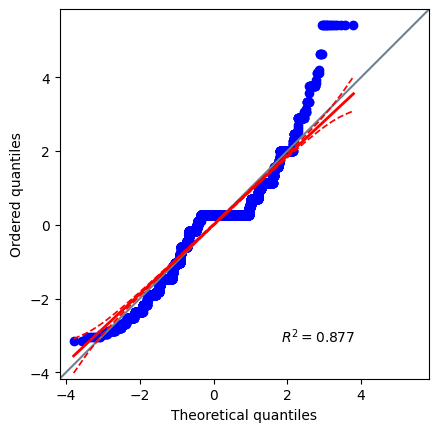

In [70]:
# Normality test graph for women

plt.show(pg.qqplot(df_female['hours_per_week'], dist='norm', confidence=.95))

#### Test if men and women work different hours a week

In [77]:
# We are going to calculate the F statistic for both groups:

group_1 = df_male['hours_per_week']
group_2 = df_female['hours_per_week']

F = group_1.var() / group_2.var() # Variance of group 1 / variance of group 2
print(f'F value is {F}')

CDF = st.f.cdf(F, len(group_1)-1, len(group_2)-1)
print(f'CDF (area under curve) is {CDF}')

print(f'P-value is {1 - CDF} and is too low to assume variances between men and women are equal')

F value is 1.0508852878991128
CDF (area under curve) is 0.9972985655522131
P-value is 0.002701434447786921 and is too low to assume variances between men and women are equal


In [83]:
def f_test(group1, group2):
   F = group_1.var()/group_2.var()
   p_value = 1-st.f.cdf(F, len(group1)-1, len(group2)-1)
   return print(f'F-test p-value: {round(p_value,4)}')


f_test(group_1, group_2)

print(st.ttest_ind(group_1, group_2, equal_var = False))
print(st.ttest_ind(group_1, group_2, equal_var = False).pvalue)
print('We reject H0 as p-value is 0 (means are statistically different)')

F-test p-value: 0.0027
Ttest_indResult(statistic=40.84854221005114, pvalue=0.0)
0.0
We reject H0 as p-value is 0 (means are statistically different)


### Question 3  
Test if men or women differ in central tendency for the variable education_num

#### Histograms: one histogram per gender and another histogram combining both.

 Male
Mean 10.134302473858709
SD 2.6315661888485233


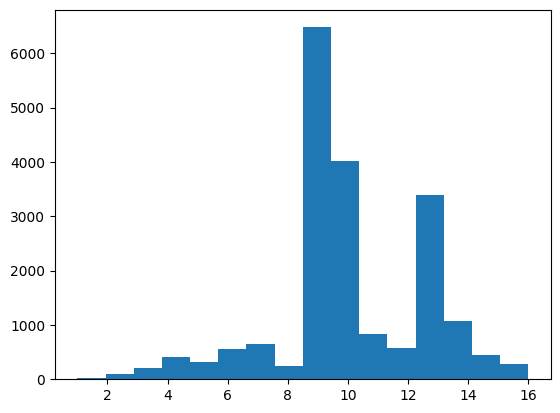

 Female
Mean 10.100310127259117
SD 2.3659869498101878


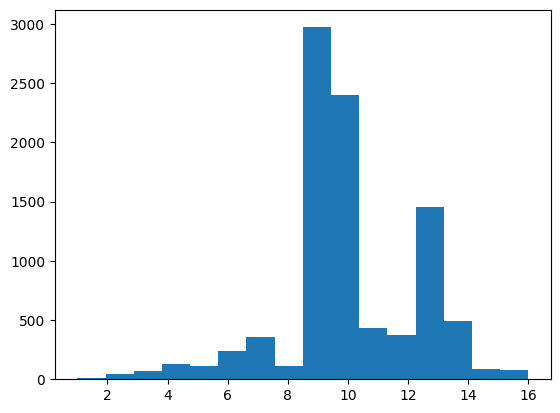

In [89]:
import numpy as np

gender = [' Male',' Female']

x = df[['education_num']][(df['gender'] == gender[0])] # Here, the gender value is Male, is the first on the list
y = df[['education_num']][(df['gender'] == gender[1])] # Women

data_list = [x, y]

lst = [x,y]
i = 0

for data in lst:
  print(gender[i])
  print('Mean', np.array(data).mean())
  print('SD', np.array(data).std())
  plt.show(plt.hist(data, len(df['education_num'].unique())))
  i += 1

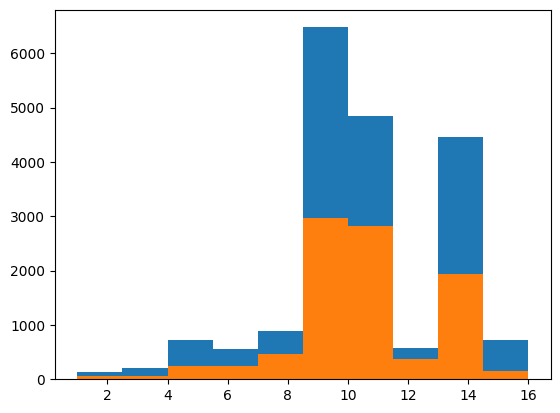

In [90]:
plt.hist(x, 10)
plt.hist(y, 10)
plt.show()

#### Calculate the contingency table for the median and test for difference in central tendency

In [92]:
x = df['education_num'][(df['gender'] == ' Male')]
y = df['education_num'][(df['gender'] == ' Female')]

median = df.education_num.median()
print(f'Median = {median}')

print(f"N of items above the median for males: {len([i for i in x if i > median])}")
print(f"N of items below or equal to the median for males: {len([i for i in x if i <= median])}")

print(f"N of items above the median for females: {len([i for i in y if i > median])}")
print(f"N of items below or equal to the median for females: {len([i for i in y if i <= median])}")

Median = 10.0
N of items above the median for males: 6596
N of items below or equal to the median for males: 13009
N of items above the median for females: 2913
N of items below or equal to the median for females: 6438


In [102]:
cont_table = st.median_test(x, y).table # save our contingency table
print('Contingency Table:\n', cont_table)

chi2_test = st.chi2_contingency(cont_table) # Apply the Chi2 test
print('Chi2 test:\n', chi2_test)

exp_freq = st.chi2_contingency(cont_table).expected_freq # If we want to see the expected value to compare to the observed one (contingency table)
print('Expected Frequency:\n', exp_freq)

p_value = st.chi2_contingency(cont_table).pvalue # To get our p-value
print(f'P-value {round(p_value, 2)}')

Contingency Table:
 [[ 6596  2913]
 [13009  6438]]
Chi2 test:
 Chi2ContingencyResult(statistic=17.7243483106493, pvalue=2.5533735673148987e-05, dof=1, expected_freq=array([[ 6438.18016991,  3070.81983009],
       [13166.81983009,  6280.18016991]]))
Expected Frequency:
 [[ 6438.18016991  3070.81983009]
 [13166.81983009  6280.18016991]]
P-value 0.0


#### Create two pie charts showing the proportions of males with doctorate degrees and women with doctorate degrees. These graphs should not be biased.

77
9274
285
19320


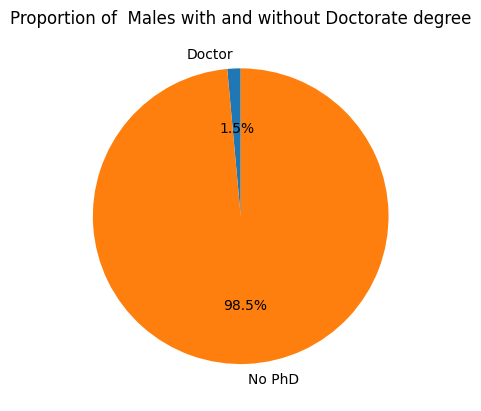

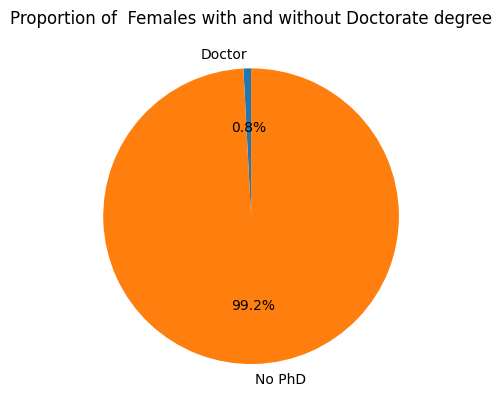

In [106]:
import matplotlib.pyplot as plt

print(len(df[(df['gender'] == ' Female') & (df['education'] == ' Doctorate')]))
print(len(df[(df['gender'] == ' Female') & (df['education'] != ' Doctorate')]))

print(len(df[(df['gender'] == ' Male') & (df['education'] == ' Doctorate')]))
print(len(df[(df['gender'] == ' Male') & (df['education'] != ' Doctorate')]))

for gender in [' Male',' Female']:
  labels = 'Doctor', 'No PhD'
  sizes = [len(df[(df['gender'] == gender) & (df['education'] == ' Doctorate')]),
           len(df[(df['gender'] == gender) & (df['education'] != ' Doctorate')])]

  fig, ax = plt.subplots()
  ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

  plt.title(f'Proportion of {gender}s with and without Doctorate degree')
  plt.show()

#### Create two pie charts as the previous, but instead of Doctorate degrees, include the proportion of males and females earning more and less than 50k a year:  
i. Males that earn more  
ii. Males that earn less  
iii. Females that earn more  
iv. Females that earn less  

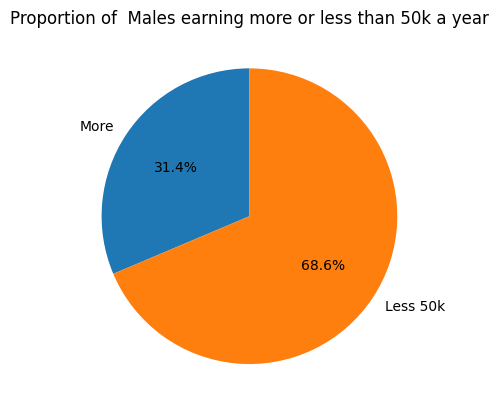

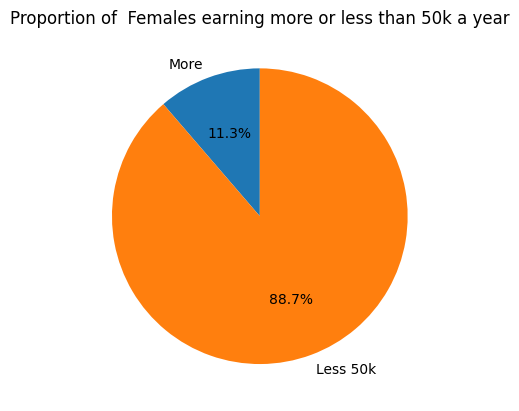

In [108]:
for gender in [' Male',' Female']:
  labels = 'More', 'Less 50k'
  sizes = [len(df[(df['gender'] == gender) & (df['greater_than_50k'] == 1)]),
           len(df[(df['gender'] == gender) & (df['greater_than_50k'] != 1)])]

  fig, ax = plt.subplots()
  ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

  plt.title(f'Proportion of {gender}s earning more or less than 50k a year')
  plt.show()

#### Create two pie charts that compares the proportion of doctors and no doctors earning more than 50k:  
i. Doctors that earn more  
ii. Doctors that earn less  
iii. No doctors that earn more  
iv. No doctors that earn less  

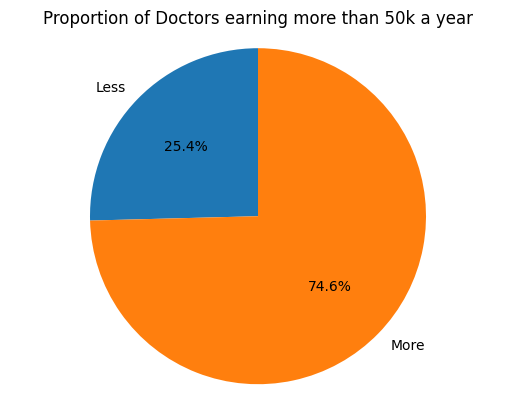

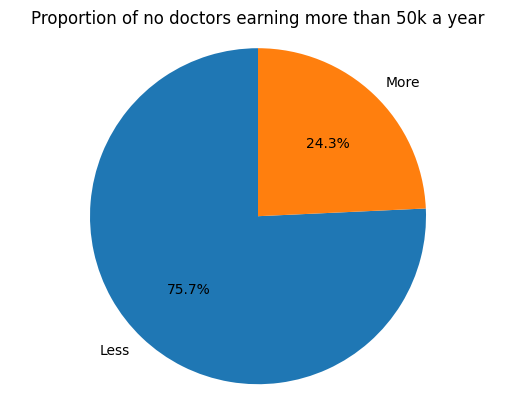

In [109]:
labels = 'Less', 'More'
sizes = [len(df[(df['education'] == ' Doctorate') & (df['greater_than_50k'] == 0)]),
        len(df[(df['education'] == ' Doctorate') & (df['greater_than_50k'] != 0)])]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'Proportion of Doctors earning more than 50k a year')
plt.show()



labels = 'Less', 'More'
sizes = [len(df[(df['education'] != ' Doctorate') & (df['greater_than_50k'] == 0)]),
        len(df[(df['education'] != ' Doctorate') & (df['greater_than_50k'] != 0)])]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'Proportion of no doctors earning more than 50k a year')
plt.show()

### Question 4  
Add your conclusions from this analysis.